Run `Alteryx.help()` for info about useful functions.  
i.e., `Alteryx.read("#1")`, `Alteryx.write(df,1)`, `Alteryx.getWorkflowConstant("Engine.WorkflowDirectory")`

In [1]:
# List all non-standard packages to be imported by your 
# script here (only missing packages will be installed)
from ayx import Package
#Package.installPackages(['pandas','numpy'])

In [2]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Input

In [3]:
#Reading the data into a dataframe
df = pd.read_csv('D:\\Users\\CChavan1\\OneDrive - JNJ\\Desktop\\Dataset.csv', delimiter=',',encoding = "palmos")
# Float format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print ("Data Shape: ", df.shape)
df.head(5)

Data Shape:  (3960, 11)


,fiscal_year,posting_period,brand,us_channel,Customer_Margin_and_Expenses,Data_and_Insights,Efficiency,Joint_Growth_Fund__Shopper_Direct_,Joint_Growth_Fund__Shopper_Indirect_,Payment_Terms,GTS
0,2019,1,AVEENO,ALL OTHER,-2872.32,44605.15,23548.14,169049.16,0.00,19278.45,1418710.02
1,2019,1,AVEENO,CLUB,0.00,16412.52,4316.80,452379.49,0.00,66017.99,3286811.08
2,2019,1,AVEENO,CONVENIENCE,0.00,3429.27,0.00,9509.50,0.00,1964.75,138799.86
3,2019,1,AVEENO,DOLLAR STORES,0.00,2464.26,0.00,11017.96,0.00,1818.31,92698.56
4,2019,1,AVEENO,DRUG RETAILER,0.00,144633.06,114496.81,755987.68,0.00,115801.38,5886058.74


## NULL Percent

In [4]:
# Find NULL Percent
print ("\nNULL Percent ----------------\n",df.isnull().sum()*100/df.shape[0])
df = df.dropna(axis=1, how = 'all') # Drop NaN
print ("\nData Types ------------------\n", df.dtypes) # Check Data Type


NULL Percent ----------------
 fiscal_year                            0.00
posting_period                         0.00
brand                                  0.00
us_channel                             0.00
Customer_Margin_and_Expenses           0.00
Data_and_Insights                      0.00
Efficiency                             0.00
Joint_Growth_Fund__Shopper_Direct_     0.00
Joint_Growth_Fund__Shopper_Indirect_   0.00
Payment_Terms                          0.00
GTS                                    0.00
dtype: float64

Data Types ------------------
 fiscal_year                               int64
posting_period                            int64
brand                                    object
us_channel                               object
Customer_Margin_and_Expenses            float64
Data_and_Insights                       float64
Efficiency                              float64
Joint_Growth_Fund__Shopper_Direct_      float64
Joint_Growth_Fund__Shopper_Indirect_    float64
Payme

## Pearson Correlation

In [5]:
df_corr = df.iloc[:,[4,5,6,7,8,9,10]]

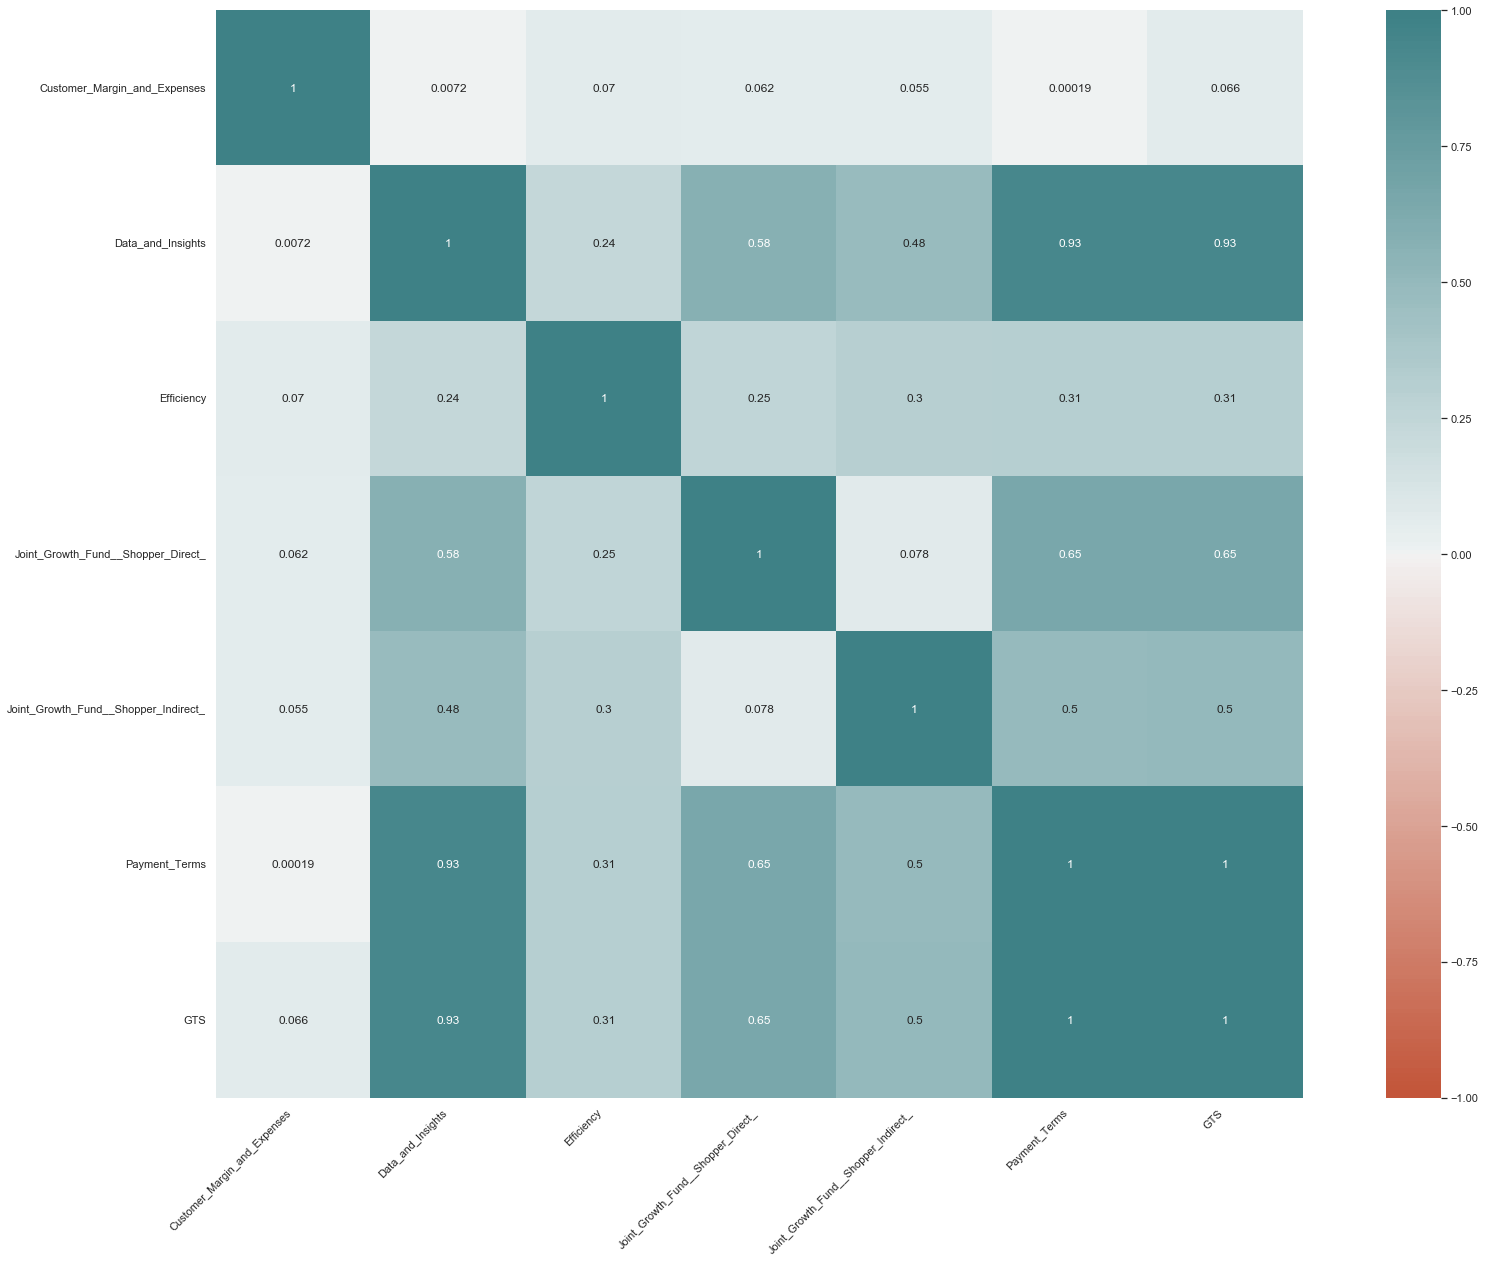

In [6]:
# Find correlation (Pearson Correlation) between attributes
sns.set(style='whitegrid')
#sns.set(font_scale = 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.figure(figsize=(30,20))
corr = df_corr.corr()
# Plotting the correlation heatmap
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 200, n=220), square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

## Univariate Analysis

### CIW Split: Customer Margin & Expenses

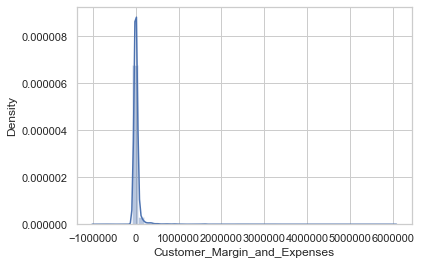

In [7]:
# Distribution of Customer Margins and Expenses
sns.distplot(df.Customer_Margin_and_Expenses)

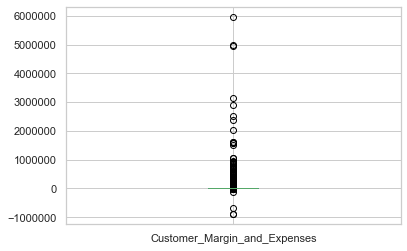

In [8]:
df.boxplot(column=['Customer_Margin_and_Expenses'])

In [9]:
# Outlier Analysis for Customer_Margin_and_Expenses
Inter_Quartile_Range = df.Customer_Margin_and_Expenses.describe()[6] - df.Customer_Margin_and_Expenses.describe()[4]
First_Quartile = df.Customer_Margin_and_Expenses.describe()[4]
Third_Quartile = df.Customer_Margin_and_Expenses.describe()[6]

# Check whether there is data outside this range: (Q1 - 1.5 * Inter Quartile Range) <= X <= (Q3 + 1.5 * Inter Quartile Range) 
df['Customer_Margin_and_Expenses'][(df['Customer_Margin_and_Expenses'] > (Third_Quartile + 1.5 * Inter_Quartile_Range)) & (df['Customer_Margin_and_Expenses'] < (First_Quartile - 1.5 * Inter_Quartile_Range))] 

Series([], Name: Customer_Margin_and_Expenses, dtype: float64)

### CIW Split: Data & Insights

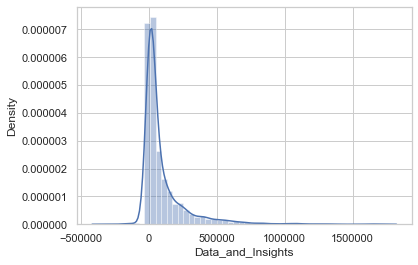

In [10]:
# Distribution of Data And Insights
sns.distplot(df.Data_and_Insights)

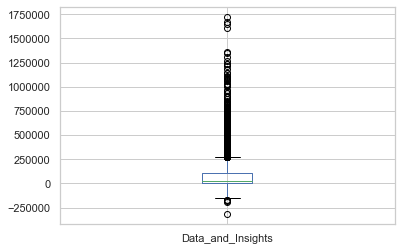

In [11]:
df.boxplot(column=['Data_and_Insights'])

In [12]:
# Outlier Analysis for Data_and_Insights
Inter_Quartile_Range = df.Data_and_Insights.describe()[6] - df.Data_and_Insights.describe()[4]
First_Quartile = df.Data_and_Insights.describe()[4]
Third_Quartile = df.Data_and_Insights.describe()[6]

# Check whether there is data outside this range: (Q1 - 1.5 * Inter Quartile Range) <= X <= (Q3 + 1.5 * Inter Quartile Range) 
df['Data_and_Insights'][(df['Data_and_Insights'] > (Third_Quartile + 1.5 * Inter_Quartile_Range)) & (df['Data_and_Insights'] < (First_Quartile - 1.5 * Inter_Quartile_Range))] 

Series([], Name: Data_and_Insights, dtype: float64)

### CIW Split: Efficiency

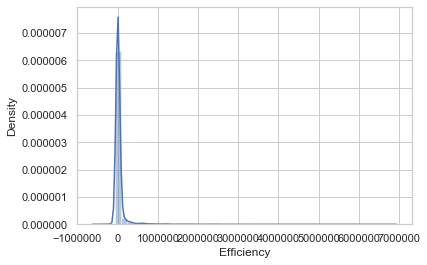

In [13]:
# Distribution of Efficiency
sns.distplot(df.Efficiency)

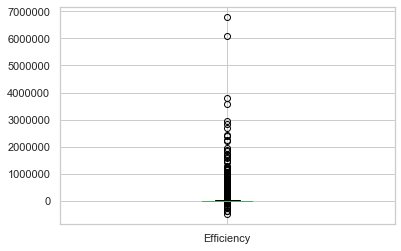

In [14]:
df.boxplot(column=['Efficiency'])

In [15]:
# Outlier Analysis for Efficiency
Inter_Quartile_Range = df.Efficiency.describe()[6] - df.Efficiency.describe()[4]
First_Quartile = df.Efficiency.describe()[4]
Third_Quartile = df.Efficiency.describe()[6]

# Check whether there is data outside this range: (Q1 - 1.5 * Inter Quartile Range) <= X <= (Q3 + 1.5 * Inter Quartile Range) 
df['Efficiency'][(df['Efficiency'] > (Third_Quartile + 1.5 * Inter_Quartile_Range)) & (df['Efficiency'] < (First_Quartile - 1.5 * Inter_Quartile_Range))] 

Series([], Name: Efficiency, dtype: float64)

### CIW Split: Joint_Growth_Fund__Shopper_Direct

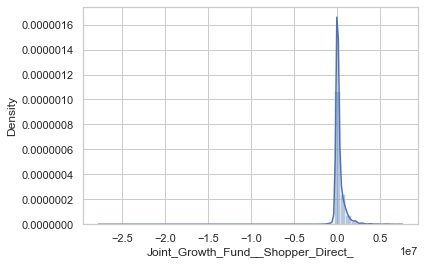

In [16]:
# Distribution of Joint_Growth_Fund__Shopper_Direct_
sns.distplot(df.Joint_Growth_Fund__Shopper_Direct_)

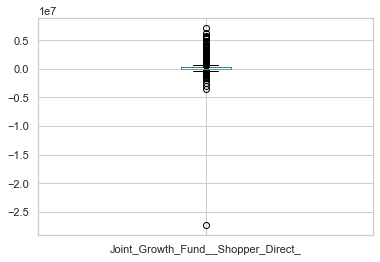

In [17]:
df.boxplot(column=['Joint_Growth_Fund__Shopper_Direct_'])

In [18]:
# Outlier Analysis for Joint_Growth_Fund__Shopper_Direct_
Inter_Quartile_Range = df.Joint_Growth_Fund__Shopper_Direct_.describe()[6] - df.Joint_Growth_Fund__Shopper_Direct_.describe()[4]
First_Quartile = df.Joint_Growth_Fund__Shopper_Direct_.describe()[4]
Third_Quartile = df.Joint_Growth_Fund__Shopper_Direct_.describe()[6]

# Check whether there is data outside this range: (Q1 - 1.5 * Inter Quartile Range) <= X <= (Q3 + 1.5 * Inter Quartile Range) 
df['Joint_Growth_Fund__Shopper_Direct_'][(df['Joint_Growth_Fund__Shopper_Direct_'] > (Third_Quartile + 1.5 * Inter_Quartile_Range)) & (df['Joint_Growth_Fund__Shopper_Direct_'] < (First_Quartile - 1.5 * Inter_Quartile_Range))] 

Series([], Name: Joint_Growth_Fund__Shopper_Direct_, dtype: float64)

### CIW Split: Joint_Growth_Fund__Shopper_Indirect

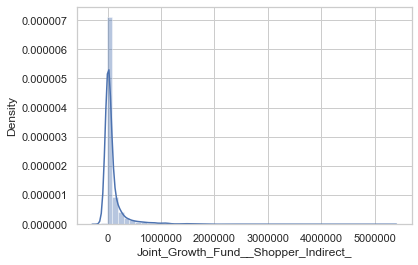

In [19]:
# Distribution of Joint_Growth_Fund__Shopper_Indirect_
sns.distplot(df.Joint_Growth_Fund__Shopper_Indirect_)

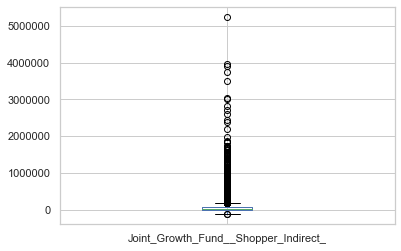

In [20]:
df.boxplot(column=['Joint_Growth_Fund__Shopper_Indirect_'])

In [21]:
# Outlier Analysis for Joint_Growth_Fund__Shopper_Indirect_
Inter_Quartile_Range = df.Joint_Growth_Fund__Shopper_Indirect_.describe()[6] - df.Joint_Growth_Fund__Shopper_Indirect_.describe()[4]
First_Quartile = df.Joint_Growth_Fund__Shopper_Indirect_.describe()[4]
Third_Quartile = df.Joint_Growth_Fund__Shopper_Indirect_.describe()[6]

# Check whether there is data outside this range: (Q1 - 1.5 * Inter Quartile Range) <= X <= (Q3 + 1.5 * Inter Quartile Range) 
df['Joint_Growth_Fund__Shopper_Indirect_'][(df['Joint_Growth_Fund__Shopper_Indirect_'] > (Third_Quartile + 1.5 * Inter_Quartile_Range)) & (df['Joint_Growth_Fund__Shopper_Indirect_'] < (First_Quartile - 1.5 * Inter_Quartile_Range))] 

Series([], Name: Joint_Growth_Fund__Shopper_Indirect_, dtype: float64)

### CIW Split: Payment_Terms 

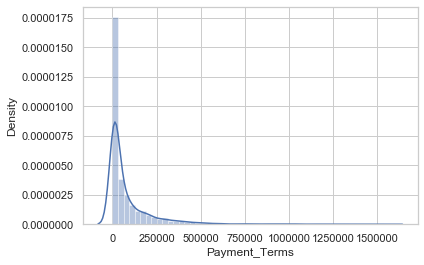

In [22]:
# Distribution of Payment_Terms
sns.distplot(df.Payment_Terms)

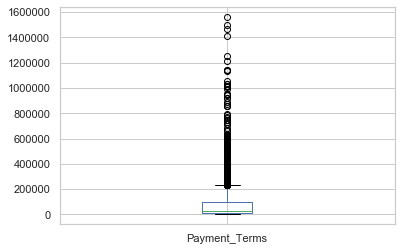

In [23]:
df.boxplot(column=['Payment_Terms'])

In [24]:
# Outlier Analysis for Payment_Terms
Inter_Quartile_Range = df.Payment_Terms.describe()[6] - df.Payment_Terms.describe()[4]
First_Quartile = df.Payment_Terms.describe()[4]
Third_Quartile = df.Payment_Terms.describe()[6]

# Check whether there is data outside this range: (Q1 - 1.5 * Inter Quartile Range) <= X <= (Q3 + 1.5 * Inter Quartile Range) 
df['Payment_Terms'][(df['Payment_Terms'] > (Third_Quartile + 1.5 * Inter_Quartile_Range)) & (df['Payment_Terms'] < (First_Quartile - 1.5 * Inter_Quartile_Range))] 

Series([], Name: Payment_Terms, dtype: float64)

### GTS

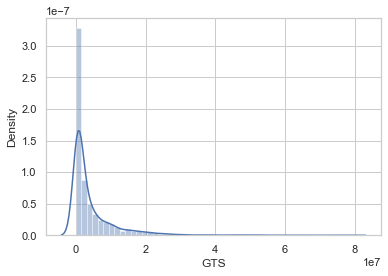

In [25]:
# Distribution of Payment_Terms
sns.distplot(df.GTS)

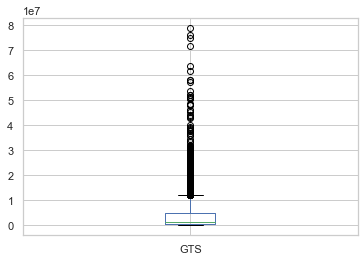

In [26]:
df.boxplot(column=['GTS'])

In [27]:
# Outlier Analysis for Payment_Terms
Inter_Quartile_Range = df.GTS.describe()[6] - df.GTS.describe()[4]
First_Quartile = df.GTS.describe()[4]
Third_Quartile = df.GTS.describe()[6]

# Check whether there is data outside this range: (Q1 - 1.5 * Inter Quartile Range) <= X <= (Q3 + 1.5 * Inter Quartile Range) 
df['GTS'][(df['GTS'] > (Third_Quartile + 1.5 * Inter_Quartile_Range)) & (df['GTS'] < (First_Quartile - 1.5 * Inter_Quartile_Range))] 

Series([], Name: GTS, dtype: float64)

## Bivariate Analysis 

### us_channel

Text(0.5, 1.0, 'Customer Channel - GTS Distribution')

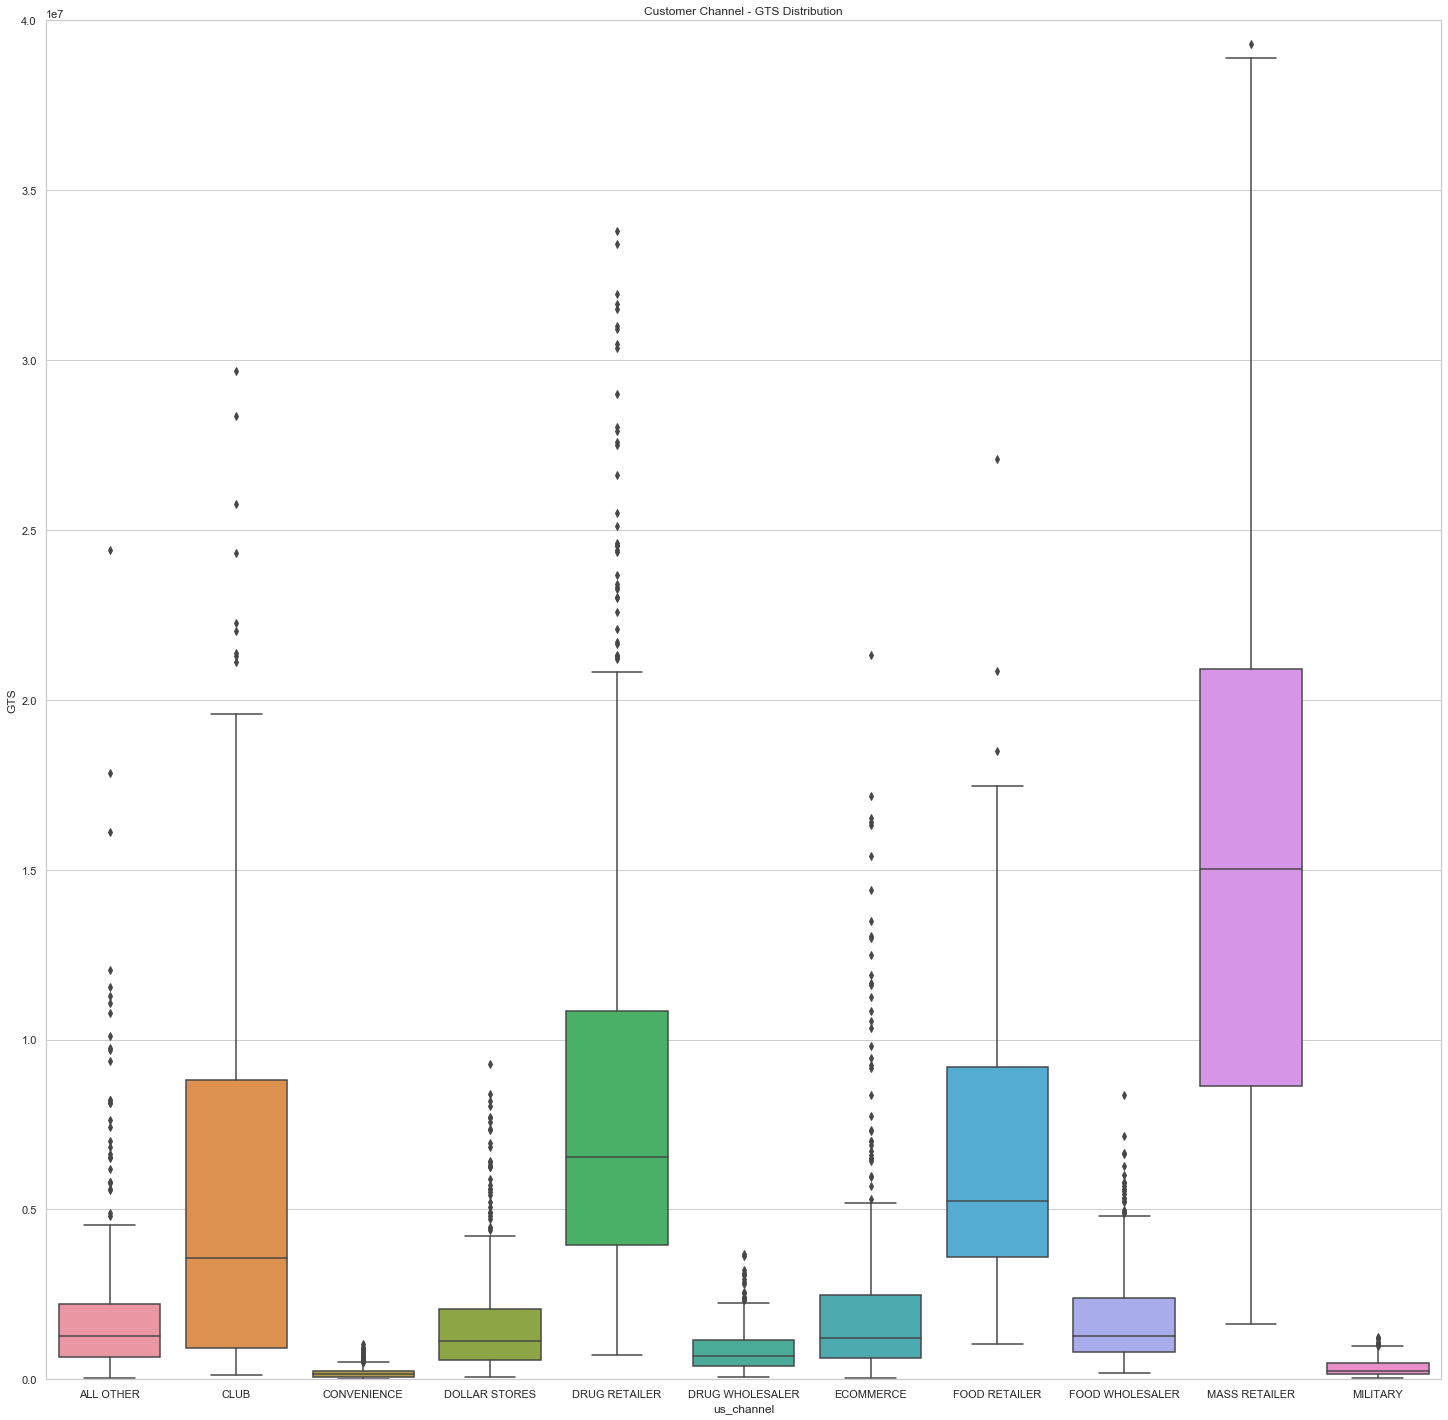

In [28]:
var =  'us_channel'
data = pd.concat([df['GTS'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 25))
fig = sns.boxplot(x=var, y="GTS", data=data)
fig.axis(ymin=0, ymax=40000000);
ax.set_title('Customer Channel - GTS Distribution')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

### Brand

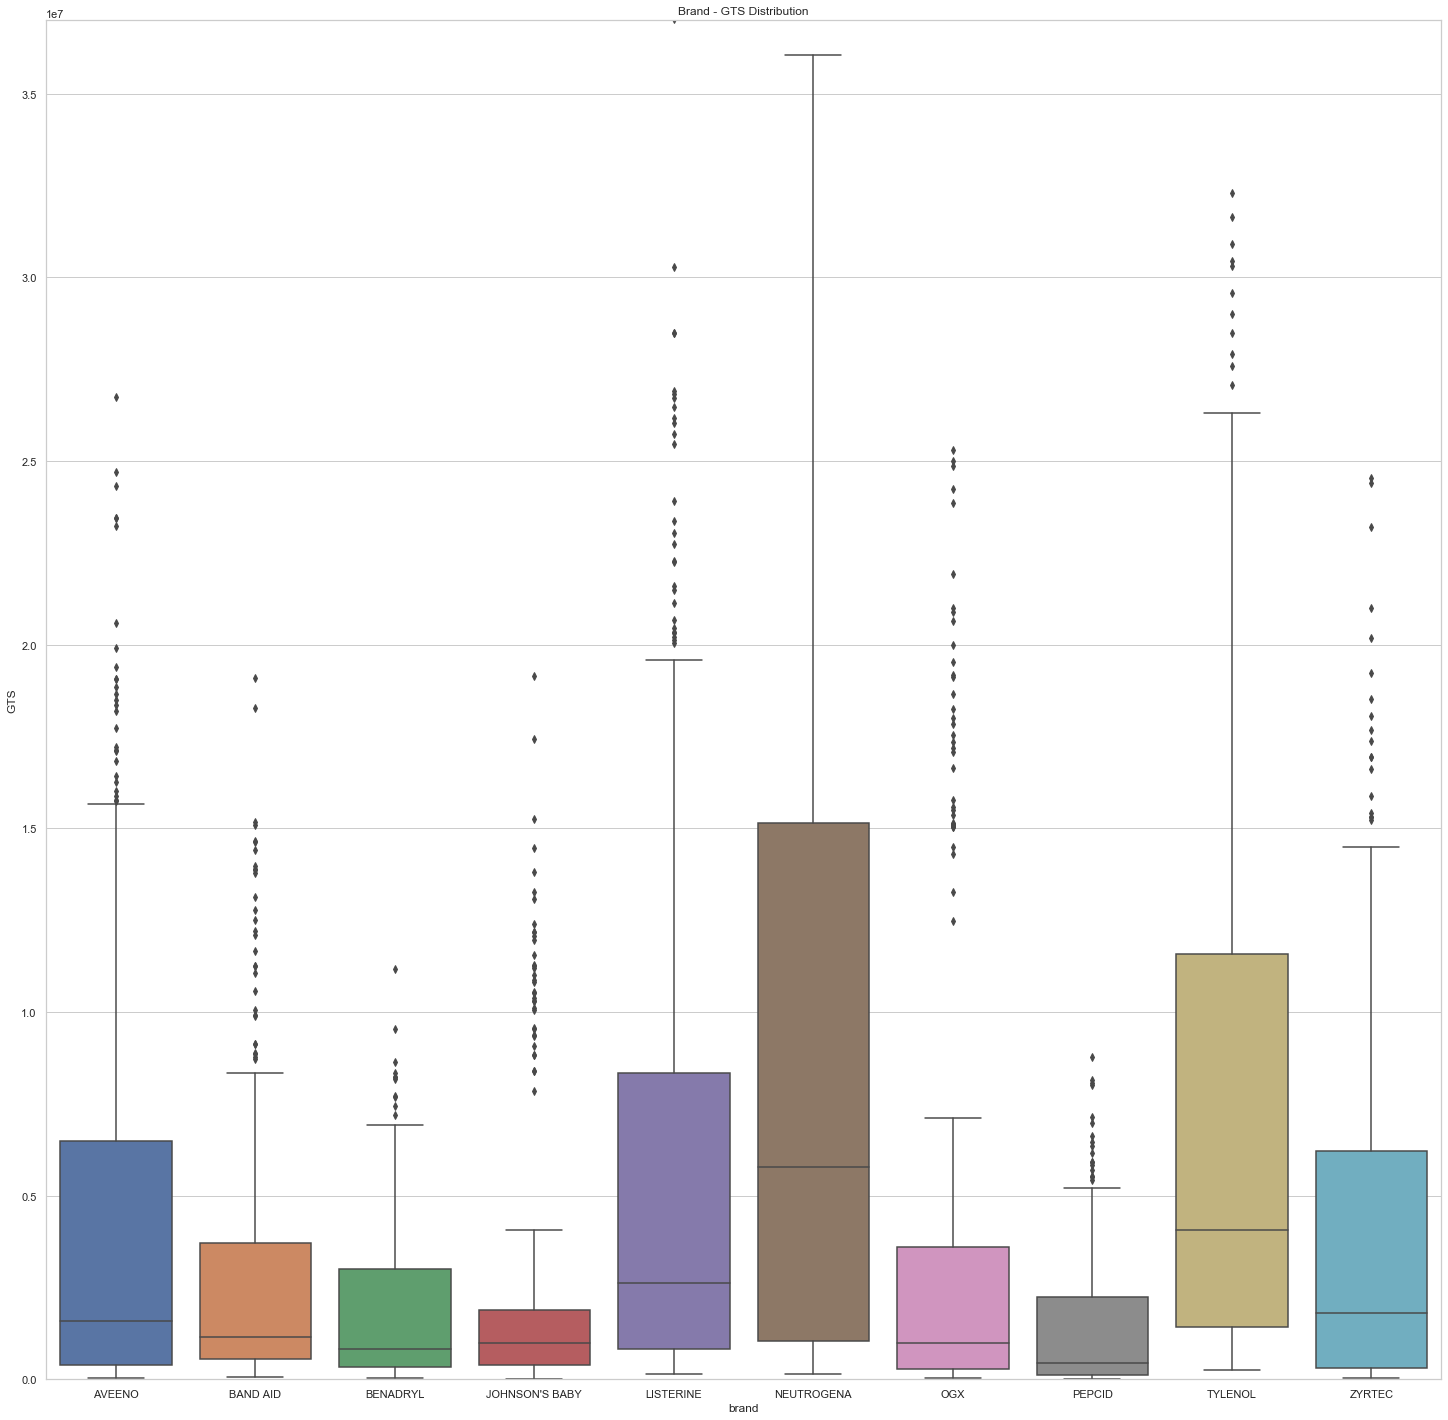

In [29]:
var =  'brand'
data = pd.concat([df['GTS'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 25))
fig = sns.boxplot(x=var, y="GTS", data=data)
fig.axis(ymin=0, ymax=37000000);
ax.set_title('Brand - GTS Distribution')
sns.set(font_scale = 1)

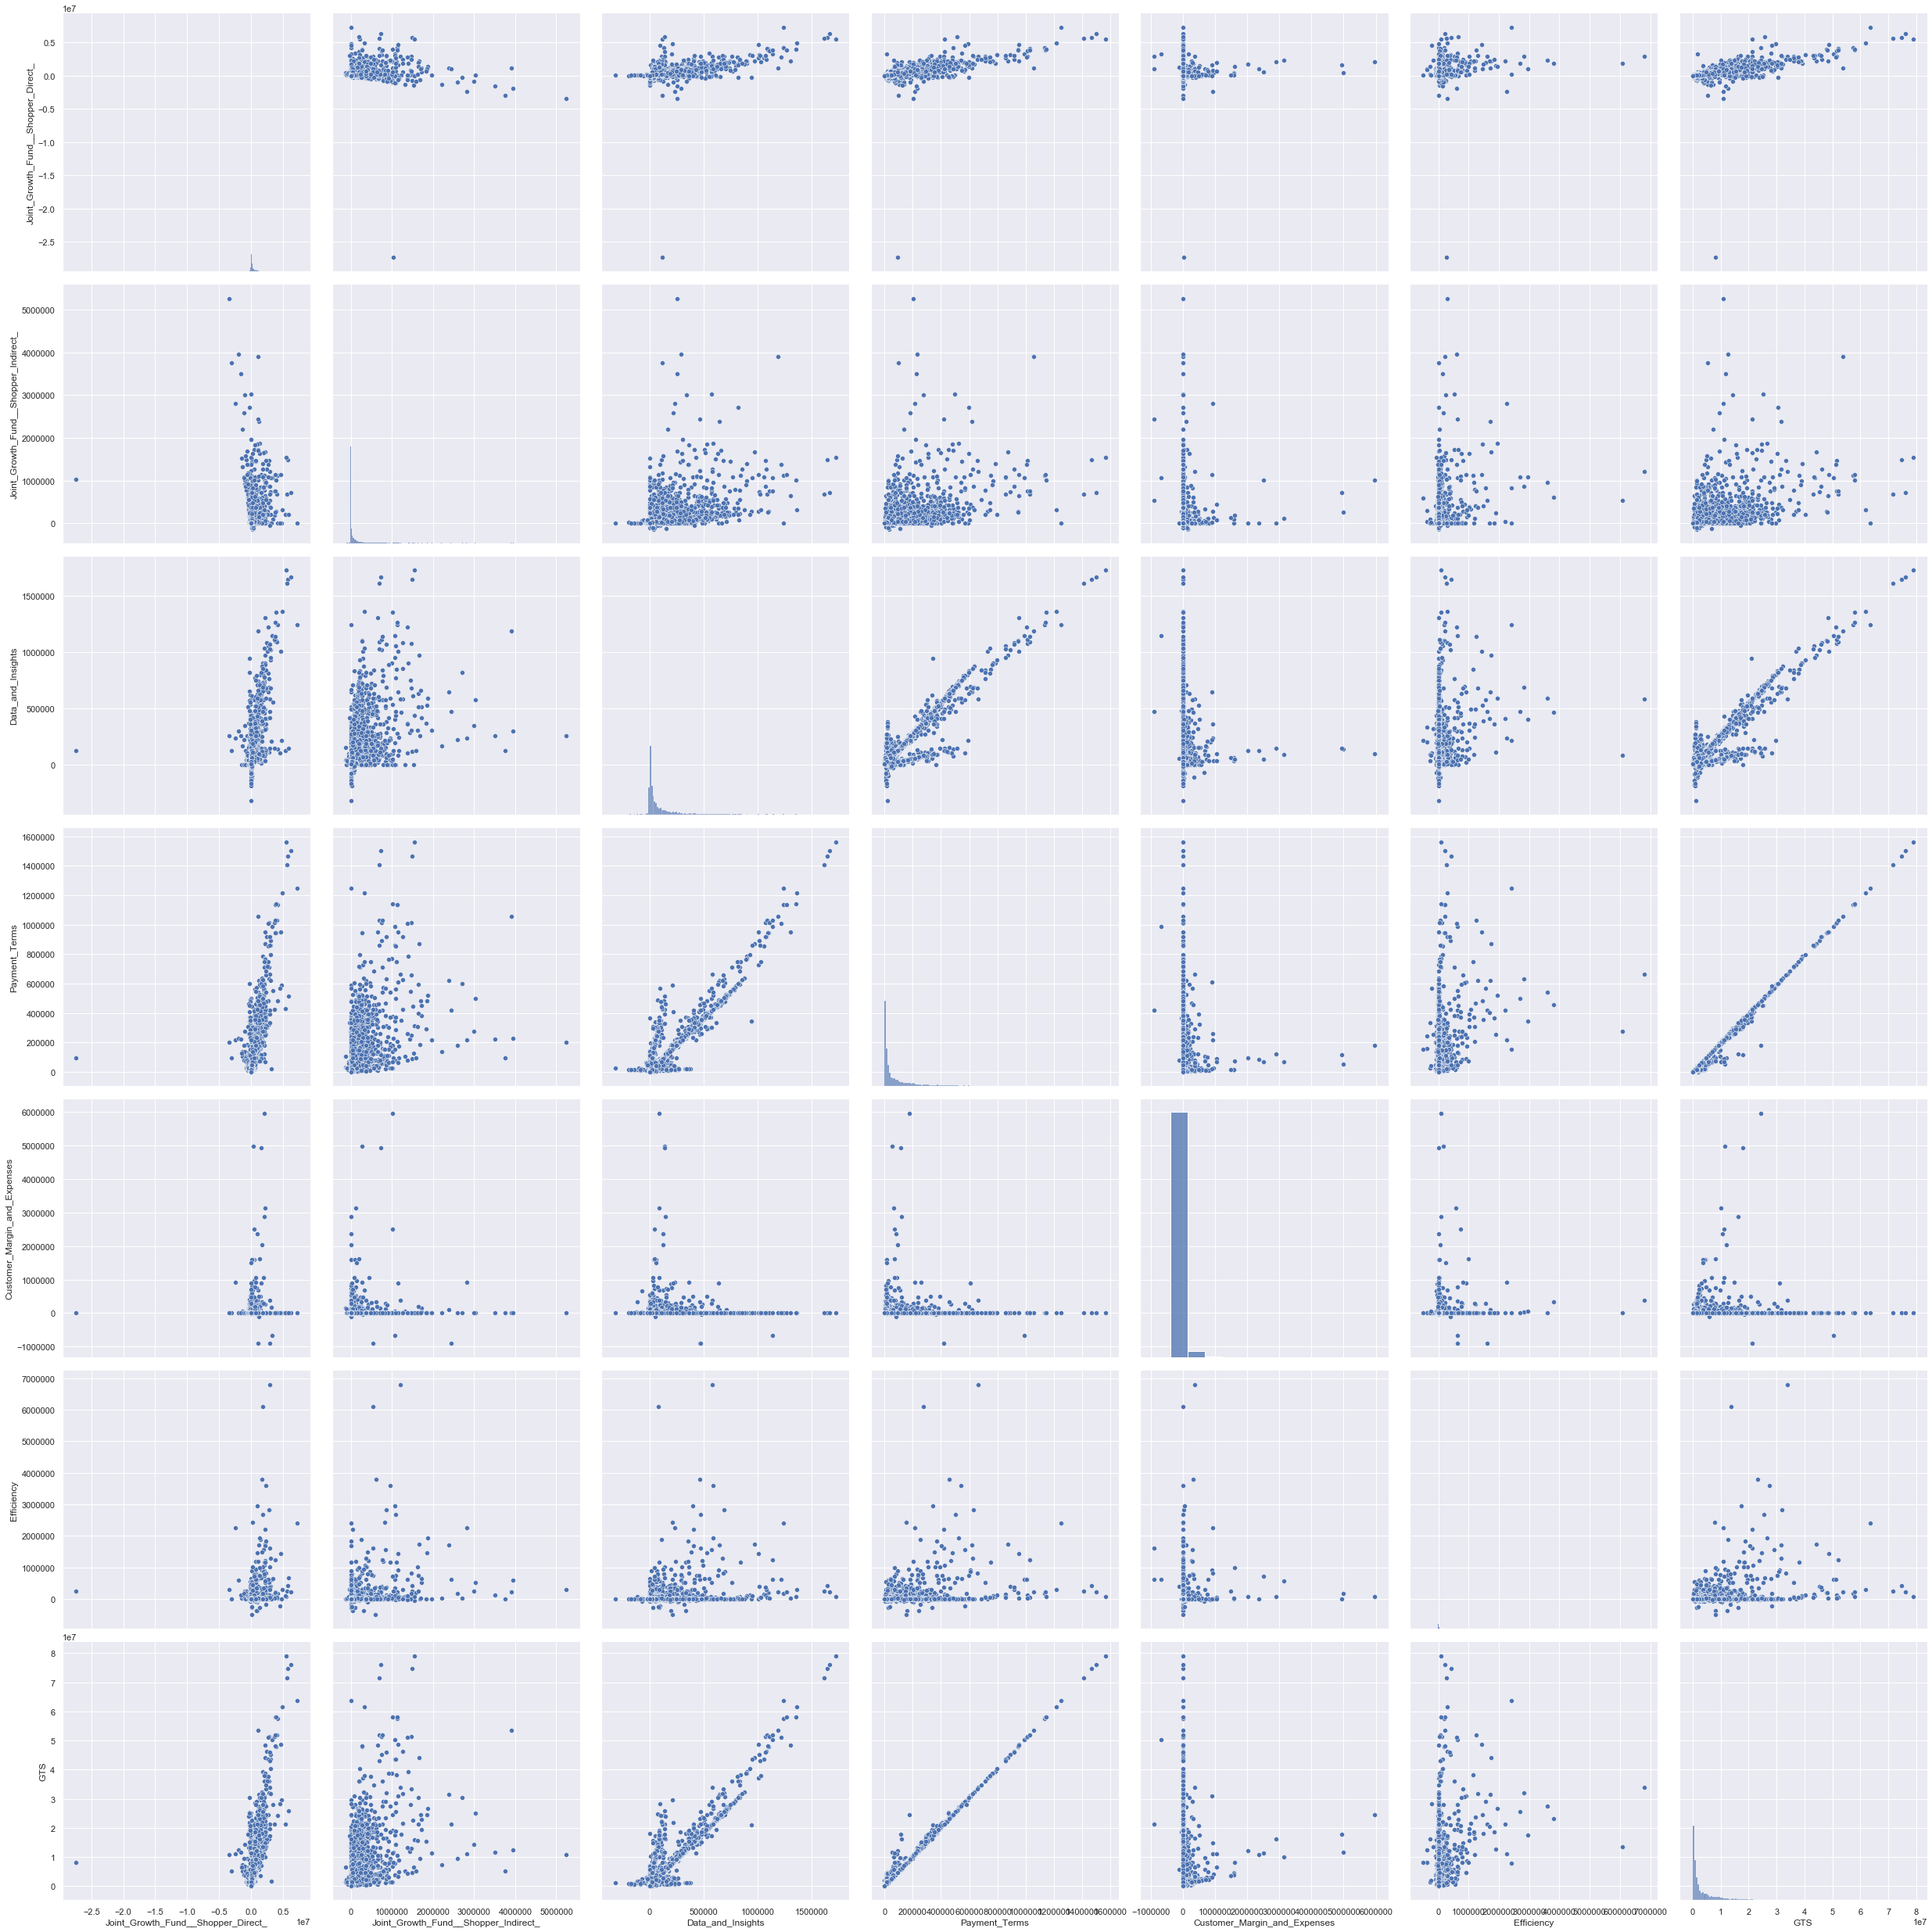

In [32]:
#scatterplot
sns.set()
cols = ['Joint_Growth_Fund__Shopper_Direct_','Joint_Growth_Fund__Shopper_Indirect_', 'Data_and_Insights', 'Payment_Terms','Customer_Margin_and_Expenses','Efficiency','GTS']
sns.pairplot(df[cols], size = 5)
plt.show()  

In [31]:
import os
current_path = os.getcwd()
print(current_path)

D:\Users\CChavan1\AppData\Local\Temp\1\13c67dee7bde53b842bdb09b821a0176\1
